# 下载 MMSegmentation

In [ ]:
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

In [1]:
# 进入主目录
import os
os.chdir('mmsegmentation')

# 安装 MMSegmentation

In [2]:
!pip install -v -e .

Using pip 23.0.1 from D:\anaconda3\envs\openmmlab\lib\site-packages\pip (python 3.8)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///D:/BUPT/openMMLab/AICamp2/OpenMMLabCampHomework/homework4_PSPNet_watermelon_segmentation/mmsegmentation
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 1.0.0
    Uninstalling mmsegmentation-1.0.0:
      Removing file or directory d:\anaconda3\envs\openmmlab\lib\site-packages\mmsegmentation.egg-link
      Removing pth entries from d:\anaconda3\envs\openmmlab\lib\site-packages\easy-install.pth:
      Removing entry: d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation
      Successfully uninstalled mmsegmentation-1.0.0
  Running setup.py develop for mmsegmentation


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info
  writing C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\PKG-INFO
  writing dependency_links to C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\dependency_links.txt
  writing requirements to C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\requires.txt
  writing top-level names to C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\top_level.txt
  writing manifest file 'C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\nxyqd\AppData\Local\Temp\pip-pip-egg-info-wdt9u5dy\mmsegmentation.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file 'C:\Users\nxy

# 下载预训练模型权重文件和数据集

In [ ]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

## 下载预训练权重至 checkpoint 目录

In [ ]:
# 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth

## 下载素材至 data 目录

In [4]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip -P data

--2023-06-14 21:22:33--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: 'data/Watermelon87_Semantic_Seg_Mask.zip'

     0K .......... .......... .......... .......... ..........  0%  842K 15s
    50K .......... .......... .......... .......... ..........  0% 2.02M 11s
   100K .......... .......... .......... .......... ..........  1% 3.80M 8s
   150K .......... .......... .......... .......... ..........  1% 4.52M 7s
   200K .......... .......... .......... .......... ..........  1% 4.29M 6s
   250K .......... .......... .......... .......... ..

手动解压该数据集

## 批量可视化图像和标注

In [7]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

# 指定图像和标注路径
PATH_IMAGE = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train'

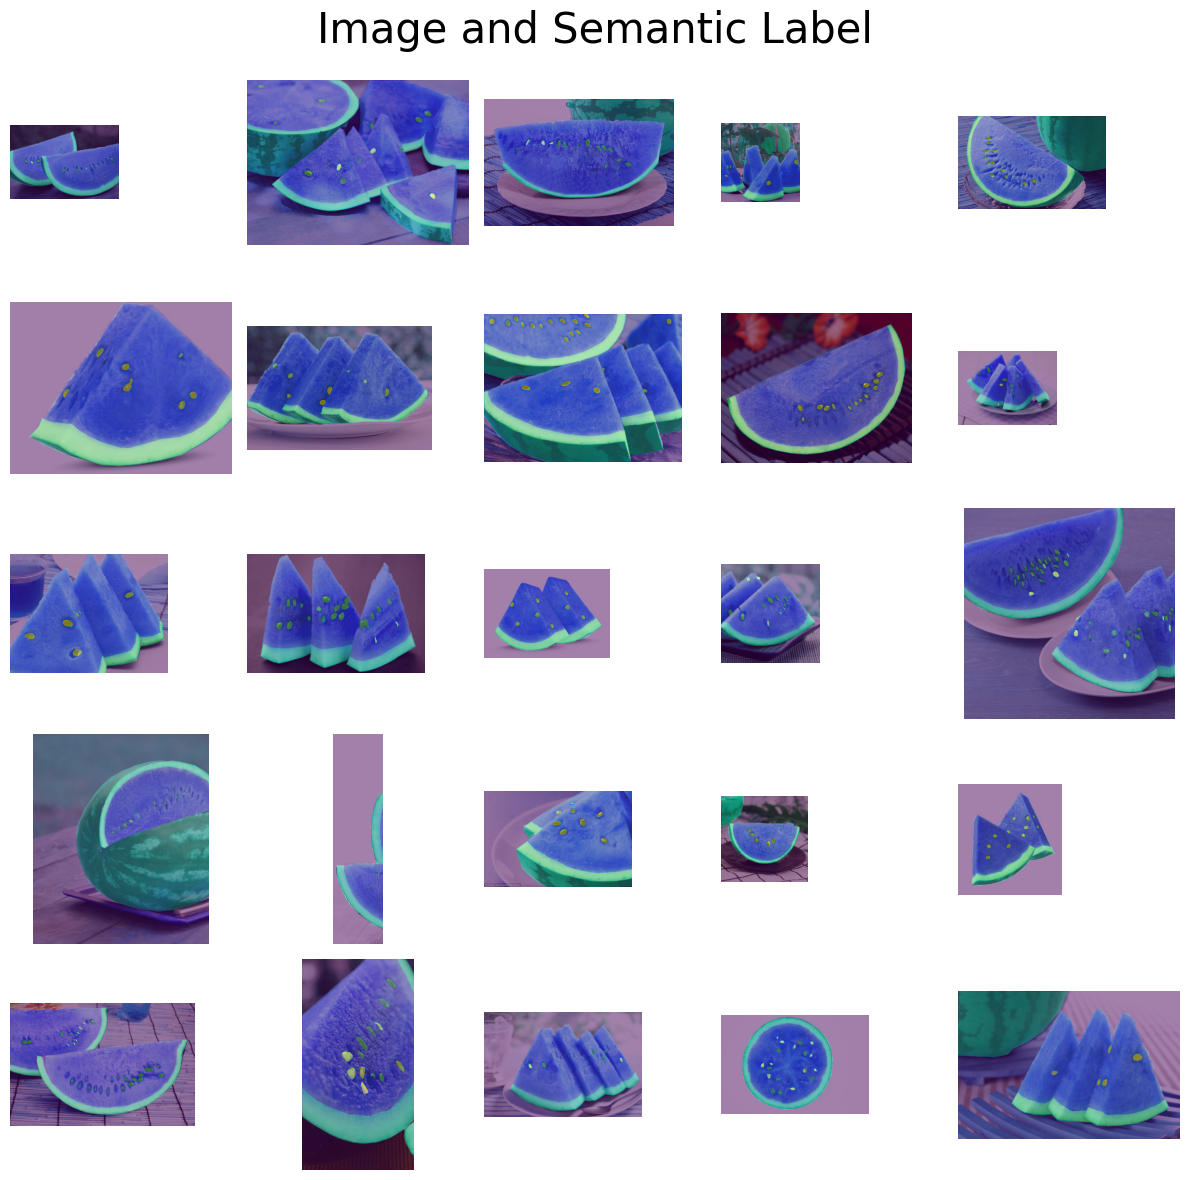

In [8]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

# 准备config配置文件

## 进入MMSegmentation主目录

In [9]:
os.getcwd()

'D:\\BUPT\\openMMLab\\AICamp2\\OpenMMLabCampHomework\\homework4_PSPNet_watermelon_segmentation\\mmsegmentation'

## 导入工具包

In [10]:
import numpy as np
from PIL import Image

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
import matplotlib.pyplot as plt
%matplotlib inline

## 定义数据集类（各类别名称及配色）

In [11]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py -P mmseg/datasets

--2023-06-14 21:37:57--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867 [binary/octet-stream]
Saving to: 'mmseg/datasets/DubaiDataset.py'

     0K                                                       100%  991K=0.001s

2023-06-14 21:37:58 (991 KB/s) - 'mmseg/datasets/DubaiDataset.py' saved [867/867]



In [31]:
config_watermelon = """
from mmseg.registry import DATASETS
from .basesegdataset import BaseSegDataset

@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
   
    METAINFO = {
        'classes':['red', 'green', 'white', 'seed-black', 'seed-white', 'Unlabeled'],
        'palette':[[132,41,246], [228,193,110], [152,16,60], [58,221,254], [41,169,226], [155,155,155]]
    }
    
    
    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False, 
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)
"""

with open('./mmseg/datasets/WatermelonDataset.py', 'w') as f:
    f.write(config_watermelon)

## 注册数据集类

In [32]:
config_watermelon = """
# Copyright (c) OpenMMLab. All rights reserved.
# yapf: disable
from .ade import ADE20KDataset
from .basesegdataset import BaseCDDataset, BaseSegDataset
from .chase_db1 import ChaseDB1Dataset
from .cityscapes import CityscapesDataset
from .coco_stuff import COCOStuffDataset
from .dark_zurich import DarkZurichDataset
from .dataset_wrappers import MultiImageMixDataset
from .decathlon import DecathlonDataset
from .drive import DRIVEDataset
from .dsdl import DSDLSegDataset
from .hrf import HRFDataset
from .isaid import iSAIDDataset
from .isprs import ISPRSDataset
from .levir import LEVIRCDDataset
from .lip import LIPDataset
from .loveda import LoveDADataset
from .mapillary import MapillaryDataset_v1, MapillaryDataset_v2
from .night_driving import NightDrivingDataset
from .pascal_context import PascalContextDataset, PascalContextDataset59
from .potsdam import PotsdamDataset
from .refuge import REFUGEDataset
from .stare import STAREDataset
from .synapse import SynapseDataset
# yapf: disable
from .transforms import (CLAHE, AdjustGamma, Albu, BioMedical3DPad,
                         BioMedical3DRandomCrop, BioMedical3DRandomFlip,
                         BioMedicalGaussianBlur, BioMedicalGaussianNoise,
                         BioMedicalRandomGamma, ConcatCDInput, GenerateEdge,
                         LoadAnnotations, LoadBiomedicalAnnotation,
                         LoadBiomedicalData, LoadBiomedicalImageFromFile,
                         LoadImageFromNDArray, LoadMultipleRSImageFromFile,
                         LoadSingleRSImageFromFile, PackSegInputs,
                         PhotoMetricDistortion, RandomCrop, RandomCutOut,
                         RandomMosaic, RandomRotate, RandomRotFlip, Rerange,
                         ResizeShortestEdge, ResizeToMultiple, RGB2Gray,
                         SegRescale)
from .voc import PascalVOCDataset
from .WatermelonDataset import WatermelonDataset

# yapf: enable
__all__ = [
    'BaseSegDataset', 'BioMedical3DRandomCrop', 'BioMedical3DRandomFlip',
    'CityscapesDataset', 'PascalVOCDataset', 'ADE20KDataset',
    'PascalContextDataset', 'PascalContextDataset59', 'ChaseDB1Dataset',
    'DRIVEDataset', 'HRFDataset', 'STAREDataset', 'DarkZurichDataset',
    'NightDrivingDataset', 'COCOStuffDataset', 'LoveDADataset',
    'MultiImageMixDataset', 'iSAIDDataset', 'ISPRSDataset', 'PotsdamDataset',
    'LoadAnnotations', 'RandomCrop', 'SegRescale', 'PhotoMetricDistortion',
    'RandomRotate', 'AdjustGamma', 'CLAHE', 'Rerange', 'RGB2Gray',
    'RandomCutOut', 'RandomMosaic', 'PackSegInputs', 'ResizeToMultiple',
    'LoadImageFromNDArray', 'LoadBiomedicalImageFromFile',
    'LoadBiomedicalAnnotation', 'LoadBiomedicalData', 'GenerateEdge',
    'DecathlonDataset', 'LIPDataset', 'ResizeShortestEdge',
    'BioMedicalGaussianNoise', 'BioMedicalGaussianBlur',
    'BioMedicalRandomGamma', 'BioMedical3DPad', 'RandomRotFlip',
    'SynapseDataset', 'REFUGEDataset', 'MapillaryDataset_v1',
    'MapillaryDataset_v2', 'Albu', 'LEVIRCDDataset',
    'LoadMultipleRSImageFromFile', 'LoadSingleRSImageFromFile',
    'ConcatCDInput', 'BaseCDDataset', 'DSDLSegDataset', 'WatermelonDataset'
]
"""

with open('./mmseg/datasets/__init__.py', 'w') as f:
    f.write(config_watermelon)

## 定义训练及测试pipeline

In [18]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py -P configs/_base_/datasets

--2023-06-14 21:47:59--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/DubaiDataset_pipeline.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268 (2.2K) [binary/octet-stream]
Saving to: 'configs/_base_/datasets/DubaiDataset_pipeline.py'

     0K ..                                                    100%  168M=0s

2023-06-14 21:47:59 (168 MB/s) - 'configs/_base_/datasets/DubaiDataset_pipeline.py' saved [2268/2268]



In [30]:
config_watermelon = """
# dataset settings
dataset_type = 'WatermelonDataset' 
data_root = 'data/Watermelon87_Semantic_Seg_Mask' 
crop_size = (64, 64)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(
        type='RandomResize',
        scale=(2048, 1024),
        ratio_range=(0.5, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='PackSegInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(2048, 1024), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]
img_ratios = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
tta_pipeline = [
    dict(type='LoadImageFromFile', file_client_args=dict(backend='disk')),
    dict(
        type='TestTimeAug',
        transforms=[
            [
                dict(type='Resize', scale_factor=r, keep_ratio=True)
                for r in img_ratios
            ],
            [
                dict(type='RandomFlip', prob=0., direction='horizontal'),
                dict(type='RandomFlip', prob=1., direction='horizontal')
            ], [dict(type='LoadAnnotations')], [dict(type='PackSegInputs')]
        ])
]
train_dataloader = dict(
    batch_size=2,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='InfiniteSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_prefix=dict(
            img_path='img_dir/train', seg_map_path='ann_dir/train'),
        pipeline=train_pipeline))
val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_prefix=dict(
            img_path='img_dir/val', seg_map_path='ann_dir/val'),
        pipeline=test_pipeline))
test_dataloader = val_dataloader

val_evaluator = dict(type='IoUMetric', iou_metrics=['mIoU'])
test_evaluator = val_evaluator

"""

with open('./configs/_base_/datasets/WatermelonDataset_pipeline.py', 'w') as f:
    f.write(config_watermelon)

## 下载模型config配置文件

In [20]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py -P configs/pspnet 

--2023-06-14 21:50:38--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/Dubai/pspnet_r50-d8_4xb2-40k_DubaiDataset.py
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344 [binary/octet-stream]
Saving to: 'configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py'

     0K                                                       100% 32.5M=0s

2023-06-14 21:50:38 (32.5 MB/s) - 'configs/pspnet/pspnet_r50-d8_4xb2-40k_DubaiDataset.py' saved [344/344]



In [26]:
config_watermelon = """
_base_ = [
    '../_base_/models/pspnet_r50-d8.py', '../_base_/datasets/WatermelonDataset_pipeline.py',
    '../_base_/default_runtime.py', '../_base_/schedules/schedule_40k.py'
]
crop_size = (64, 64)
data_preprocessor = dict(size=crop_size)
model = dict(data_preprocessor=data_preprocessor)

"""

with open('configs/pspnet/pspnet_r50-d8_4xb2-40k_WatermelonDataset.py', 'w') as f:
    f.write(config_watermelon)

## 载入config配置文件

In [33]:
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_WatermelonDataset.py')

## 修改config配置文件

In [34]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

## 保存config配置文件

In [35]:
cfg.dump('pspnet-WatermelonDataset_20230612.py')

# MMSegmentation训练语义分割模型

In [2]:
import os
os.chdir('./mmsegmentation')
os.getcwd()

'D:\\BUPT\\openMMLab\\AICamp2\\OpenMMLabCampHomework\\homework4_PSPNet_watermelon_segmentation\\mmsegmentation'

## 导入工具包

In [2]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine

## 载入config配置文件

In [3]:
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230612.py')

## 准备训练

In [4]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/14 22:17:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3080 Ti Laptop GPU
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.7
    NVCC: Cuda compilation tools, release 11.7, V11.7.64
    MSVC: n/a, reason: fileno
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/14 22:17:49 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/14 22:17:49 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 开始训练

In [5]:
runner.train()

06/14 22:17:50 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/14 22:17:51 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/14 22:17:51 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/14 22:17:51 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/14 22:17:51 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/14 22:17:51 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/14 22:17:51 - mmengine - INFO - Checkpoints will be saved to D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\work_dirs\WatermelonDataset.
06/14 22:17:57 - mmengine - INFO - Exp name: pspnet-WatermelonDataset_202

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

# 测试集性能评估

## 测试集精度指标

In [3]:
!python tools/test.py pspnet-WatermelonDataset_20230612.py work_dirs/WatermelonDataset/iter_3000.pth

06/14 22:38:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3080 Ti Laptop GPU
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.7
    NVCC: Cuda compilation tools, release 11.7, V11.7.64
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.32.31332 版
    GCC: n/a
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=comp

d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
d:\bupt\

## 速度指标-FPS

In [5]:
!python tools/analysis_tools/benchmark.py pspnet-WatermelonDataset_20230612.py work_dirs/WatermelonDataset/iter_3000.pth

Run 1:
Loads checkpoint by local backend from path: work_dirs/WatermelonDataset/iter_3000.pth
Average fps of 1 evaluations: nan
The variance of 1 evaluations: nan


d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\bupt\openmmlab\aicamp2\openmmlabcamphomework\homework4_pspnet_watermelon_segmentation\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
D:\anaconda3\envs\openmmlab\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda3\envs\openmmlab\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = r

# 用训练得到的模型预测

## 载入配置文件

In [6]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230612.py')

In [9]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/14 22:41:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 3080 Ti Laptop GPU
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.7
    NVCC: Cuda compilation tools, release 11.7, V11.7.64
    MSVC: n/a, reason: fileno
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

D:\anaconda3\envs\openmmlab\lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\mod

06/14 22:41:50 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/14 22:41:50 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

D:\BUPT\openMMLab\AICamp2\OpenMMLabCampHomework\homework4_PSPNet_watermelon_segmentation\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 载入模型

In [10]:
checkpoint_path = './work_dirs/WatermelonDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/iter_3000.pth


## 载入新图像

In [11]:
img = mmcv.imread('../img/test.jpg')

## 语义分割预测

In [12]:
result = inference_model(model, img)

In [13]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [14]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [15]:
pred_mask.shape

(150, 150)

In [16]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4], dtype=int64)

## 可视化语义分割预测结果

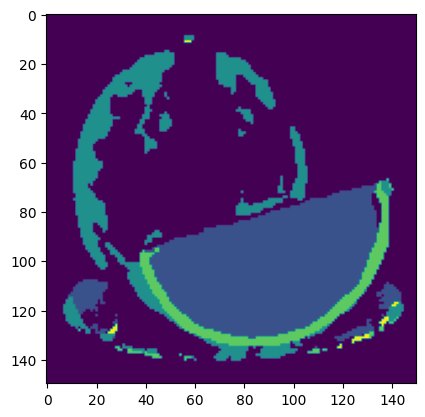

In [17]:
plt.imshow(pred_mask)
plt.show()

06/14 22:42:42 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


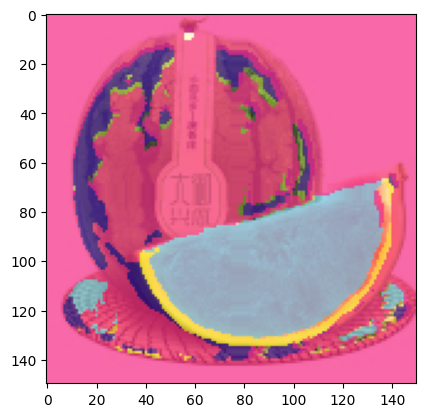

In [19]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()